<a href="https://colab.research.google.com/github/vinhpeters/tf-exam/blob/main/03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Computer Vision with Covolutional Neural Networks

In [1]:
import tensorflow as tf
import zipfile

## Using subset of Food 101 dataset

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [3]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

## Data exploration

In [4]:
!ls pizza_steak/train/pizza

In [5]:
import os 

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'Dirs: {len(dirnames)}, imgs:{len(filenames)} in {dirpath}')

Dirs: 2, imgs:0 in pizza_steak
Dirs: 2, imgs:0 in pizza_steak\test
Dirs: 0, imgs:250 in pizza_steak\test\pizza
Dirs: 0, imgs:250 in pizza_steak\test\steak
Dirs: 2, imgs:0 in pizza_steak\train
Dirs: 0, imgs:750 in pizza_steak\train\pizza
Dirs: 0, imgs:750 in pizza_steak\train\steak


In [6]:
num_steak=len(os.listdir('pizza_steak/train/steak'))
num_steak

750

In [7]:
num_pizza=len(os.listdir('pizza_steak/train/pizza'))
num_pizza

750

## Get class names programmitically

In [8]:
import pathlib
import numpy as np 
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))

In [9]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [121]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(random_image)
  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 512, 3)


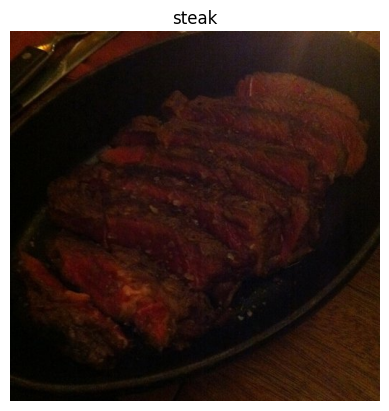

In [11]:
img = view_random_image(target_dir='pizza_steak/train/', target_class='steak')

## An end-to-end example

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'


train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode ='binary', seed=42)
valid_data = train_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode ='binary', seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters =10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model_1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

histor_1=model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 12s 232ms/step - loss: 0.5870 - accuracy: 0.6733 - val_loss: 0.3835 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 4s 84ms/step - loss: 0.4216 - accuracy: 0.8120 - val_loss: 0.4440 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 4s 82ms/step - loss: 0.3973 - accuracy: 0.8247 - val_loss: 0.3466 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 4s 82ms/step - loss: 0.3495 - accuracy: 0.8553 - val_loss: 0.3147 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 4s 85ms/step - loss: 0.3123 - accuracy: 0.8707 - val_loss: 0.3171 - val_accuracy: 0.8700


In [15]:
model_1.evaluate(valid_data)

16/16 [==============================] - 1s 60ms/step - loss: 0.3171 - accuracy: 0.8700


[0.31709516048431396, 0.8700000643730164]

In [16]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 4s 87ms/step - loss: 0.8679 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 86ms/step - loss: 0.6933 - accuracy: 0.4573 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 83ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 83ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 85ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 5s 88ms/step - loss: 3.0653 - accuracy: 0.5873 - val_loss: 1.1349 - val_accuracy: 0.6000
Epoch 2/5
47/47 [==============================] - 4s 86ms/step - loss: 0.9029 - accuracy: 0.6713 - val_loss: 1.0977 - val_accuracy: 0.6560
Epoch 3/5
47/47 [==============================] - 4s 84ms/step - loss: 0.6206 - accuracy: 0.7287 - val_loss: 0.4737 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 4s 88ms/step - loss: 0.4925 - accuracy: 0.7820 - val_loss: 0.4453 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 4s 87ms/step - loss: 0.5095 - accuracy: 0.7647 - val_loss: 0.8600 - val_accuracy: 0.6240


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (465, 512, 3)
Image shape: (512, 512, 3)


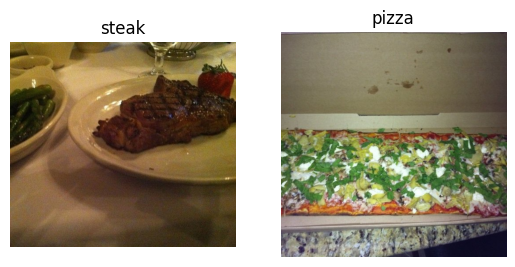

In [20]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak') 
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

In [21]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

## Batching

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode ='binary', seed=42)
test_data = train_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode ='binary', seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [24]:
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [25]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [26]:
## Baseline CNN Model

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [28]:
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3),activation='relu'),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model_4.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 5s 87ms/step - loss: 1.1563 - accuracy: 0.6347 - val_loss: 0.5115 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 4s 89ms/step - loss: 0.4682 - accuracy: 0.7873 - val_loss: 0.4258 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 4s 85ms/step - loss: 0.3705 - accuracy: 0.8473 - val_loss: 0.3573 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 4s 86ms/step - loss: 0.2654 - accuracy: 0.8973 - val_loss: 0.4697 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 4s 85ms/step - loss: 0.1680 - accuracy: 0.9453 - val_loss: 0.4690 - val_accuracy: 0.8080


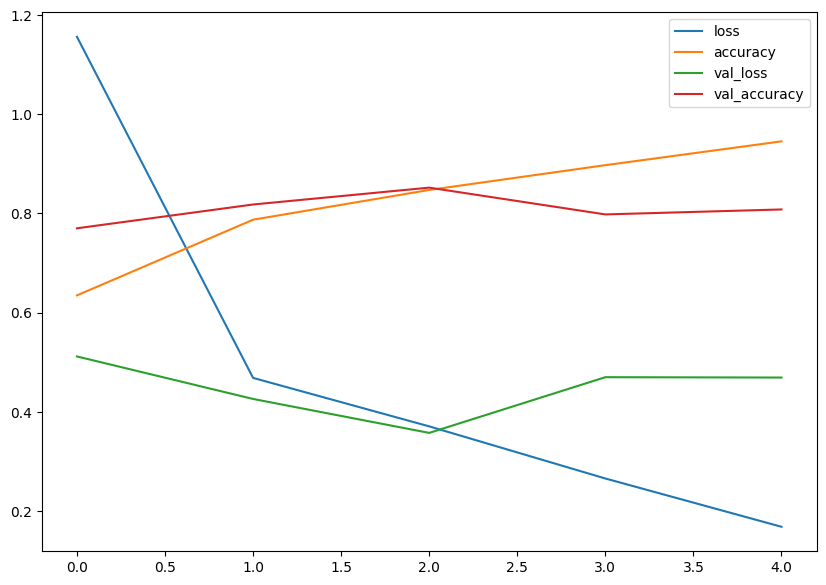

In [29]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [30]:
def plot_loss_curves(history):
  '''
  Returns seperate loss curves for training and validation metrics
  '''

  loss = history.history['loss']
  accuracy = history.history['accuracy']
  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  plt.plot(epochs,loss, label='training_loss')
  plt.plot(epochs,val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs,val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()


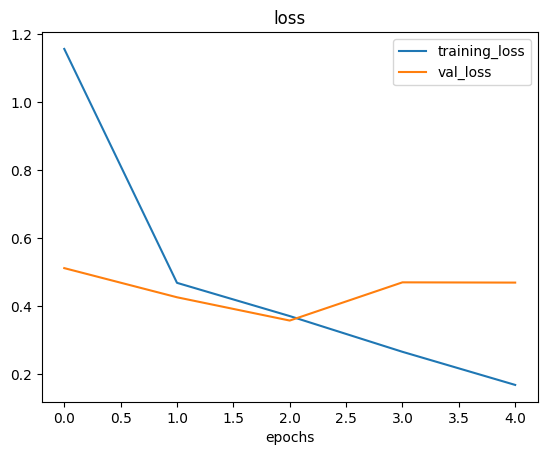

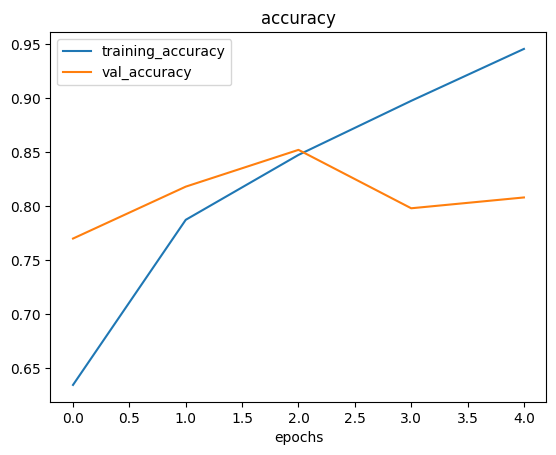

In [31]:
plot_loss_curves(history_4)

In [32]:
model_5 = Sequential([
    Conv2D(filters=10, kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3),activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model_5.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 5s 90ms/step - loss: 0.6147 - accuracy: 0.6753 - val_loss: 0.5085 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 4s 88ms/step - loss: 0.4809 - accuracy: 0.7813 - val_loss: 0.3847 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 4s 85ms/step - loss: 0.4321 - accuracy: 0.8107 - val_loss: 0.3596 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 4s 88ms/step - loss: 0.4219 - accuracy: 0.8193 - val_loss: 0.3439 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 4s 87ms/step - loss: 0.3818 - accuracy: 0.8380 - val_loss: 0.3446 - val_accuracy: 0.8540


In [33]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

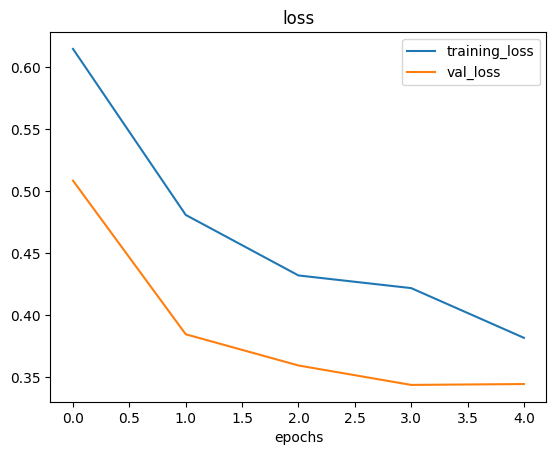

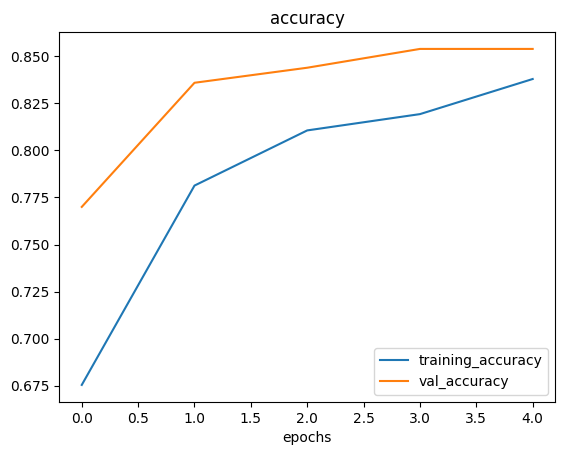

In [34]:
plot_loss_curves(history_5)

## Data augmentation

In [35]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255, rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode ='binary', shuffle=False)
train_data= train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode ='binary', shuffle=False)

test_data = train_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode ='binary', seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [50]:
images, labels=train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

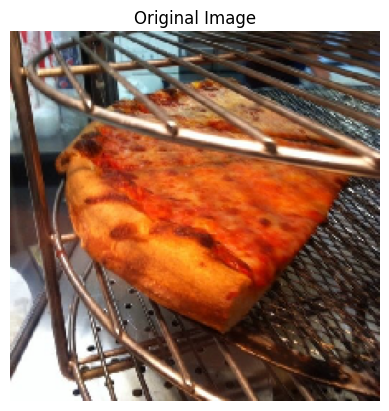

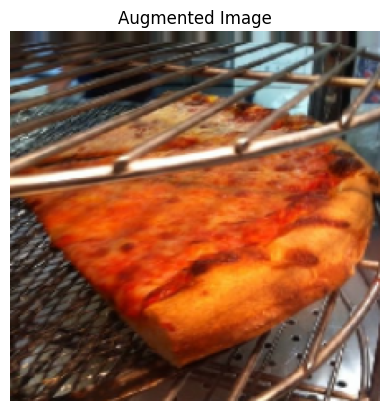

In [51]:
import random

random_number = random.randint(0,31)
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.figure();
plt.imshow(augmented_images[random_number])
plt.title('Augmented Image')
plt.axis(False);




In [52]:
model_6 = Sequential([
    Conv2D(filters=10, kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3),activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model_6.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_6 = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 308ms/step - loss: 0.7695 - accuracy: 0.5420 - val_loss: 0.6902 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 14s 301ms/step - loss: 0.6919 - accuracy: 0.5447 - val_loss: 0.6844 - val_accuracy: 0.5300
Epoch 3/5
47/47 [==============================] - 14s 298ms/step - loss: 0.6869 - accuracy: 0.5513 - val_loss: 0.6637 - val_accuracy: 0.5720
Epoch 4/5
47/47 [==============================] - 14s 297ms/step - loss: 0.6618 - accuracy: 0.6287 - val_loss: 0.5536 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 14s 298ms/step - loss: 0.6501 - accuracy: 0.6033 - val_loss: 0.5062 - val_accuracy: 0.7820


In [53]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode ='binary')

Found 1500 images belonging to 2 classes.


In [54]:
model_7 = Sequential([
    Conv2D(filters=10, kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3),activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model_7.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_7 = model_7.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 300ms/step - loss: 0.6321 - accuracy: 0.6233 - val_loss: 0.4939 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 14s 298ms/step - loss: 0.5419 - accuracy: 0.7373 - val_loss: 0.4490 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 14s 296ms/step - loss: 0.4935 - accuracy: 0.7813 - val_loss: 0.4709 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 14s 295ms/step - loss: 0.4829 - accuracy: 0.7733 - val_loss: 0.4171 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 14s 297ms/step - loss: 0.4518 - accuracy: 0.7920 - val_loss: 0.3490 - val_accuracy: 0.8480


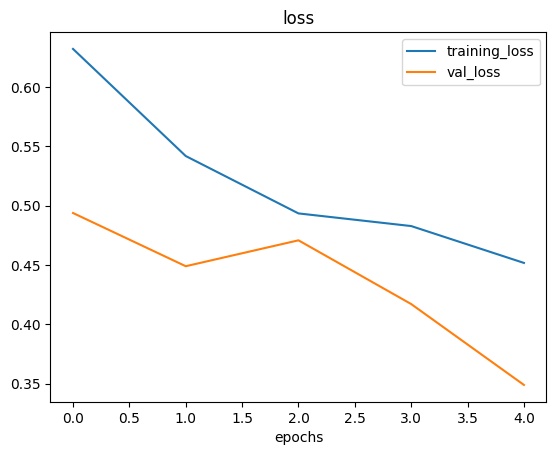

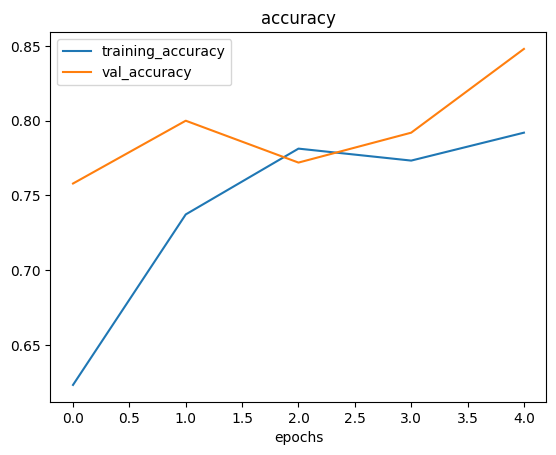

In [55]:
plot_loss_curves(history_7)

In [56]:
model_8 = Sequential([
    Conv2D(filters=10, kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3),activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model_8.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_8 = model_8.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 298ms/step - loss: 0.6804 - accuracy: 0.5887 - val_loss: 0.6199 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 14s 296ms/step - loss: 0.5915 - accuracy: 0.7100 - val_loss: 0.4820 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 15s 320ms/step - loss: 0.5442 - accuracy: 0.7413 - val_loss: 0.4403 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 14s 295ms/step - loss: 0.5489 - accuracy: 0.7380 - val_loss: 0.4770 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 14s 304ms/step - loss: 0.5425 - accuracy: 0.7300 - val_loss: 0.4411 - val_accuracy: 0.8340


## Making a prediction an another image

In [57]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

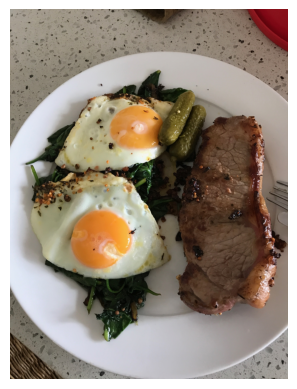

In [58]:
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [59]:
steak.shape

(4032, 3024, 3)

In [60]:
def load_and_prep_image(filename, img_shape=224):
  '''
  Reads an image from a filename and reshapes it into a tensor (img_shape,img_shape, color_channels)
  '''

  img = tf.io.read_file(filename)
  img= tf.image.decode_image(img)
  img=tf.image.resize(img, size=[img_shape,img_shape])
  img=img/255.
  
  return img

In [61]:
steak =load_and_prep_image('03-steak.jpeg')

In [62]:
steak.shape

TensorShape([224, 224, 3])

In [63]:
model_8.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 81ms/step


array([[0.88230366]], dtype=float32)

In [64]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [175]:
def pred_and_plot(model,filename, class_names=class_names):
  '''
  Imports and image, makes a prediction with model
  and plots the image with the predicited class as the title
  '''

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0])>1 :
    pred_class = class_names[tf.argmax(pred[0])]

  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);


1/1 [==============================] - 0s 29ms/step


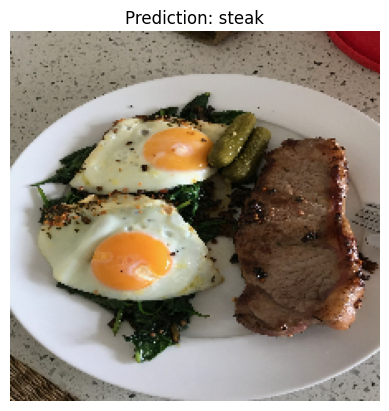

In [70]:
pred_and_plot(model_7, '03-steak.jpeg')

# Multi-class CNNs

In [73]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


In [74]:
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

## Data exploration

In [76]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'Dirs: {len(dirnames)}, imgs:{len(filenames)} in {dirpath}')

Dirs: 2, imgs:0 in pizza_steak
Dirs: 2, imgs:0 in pizza_steak\test
Dirs: 0, imgs:250 in pizza_steak\test\pizza
Dirs: 0, imgs:250 in pizza_steak\test\steak
Dirs: 2, imgs:0 in pizza_steak\train
Dirs: 0, imgs:750 in pizza_steak\train\pizza
Dirs: 0, imgs:750 in pizza_steak\train\steak


In [84]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [82]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['60655.jpg']
Image shape: (384, 512, 3)


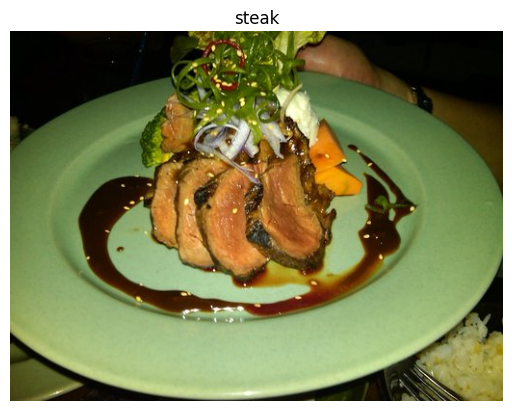

In [132]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

## Data Pre-proccessing

In [134]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255, rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode ='categorical', shuffle=True)
train_data= train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode ='categorical', shuffle=True)

test_data = train_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode ='categorical', seed=42)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [136]:
model_9 = Sequential([
    Conv2D(filters=10, kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3),activation='relu'),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])


model_9.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_9 = model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 241ms/step - loss: 2.2267 - accuracy: 0.1940 - val_loss: 2.0430 - val_accuracy: 0.2684
Epoch 2/5
235/235 [==============================] - 22s 92ms/step - loss: 1.8749 - accuracy: 0.3539 - val_loss: 2.0017 - val_accuracy: 0.2860
Epoch 3/5
235/235 [==============================] - 22s 93ms/step - loss: 1.3577 - accuracy: 0.5429 - val_loss: 2.2886 - val_accuracy: 0.2880
Epoch 4/5
235/235 [==============================] - 21s 91ms/step - loss: 0.7155 - accuracy: 0.7647 - val_loss: 2.8962 - val_accuracy: 0.2844
Epoch 5/5
235/235 [==============================] - 22s 93ms/step - loss: 0.2642 - accuracy: 0.9200 - val_loss: 4.2206 - val_accuracy: 0.2592


In [138]:
model_9.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 4.2206 - accuracy: 0.2592


[4.220556735992432, 0.25920000672340393]

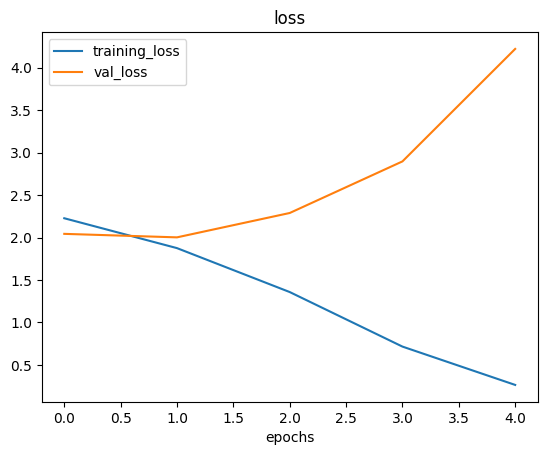

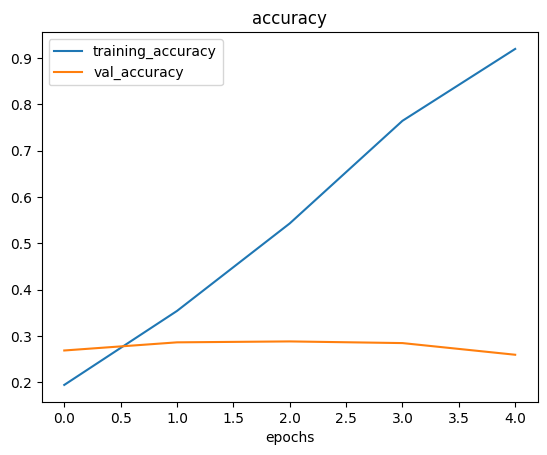

In [139]:
plot_loss_curves(history=history_9)

## Regularization

In [144]:
model_10 = Sequential([
    Conv2D(filters=10, kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3),activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])


model_10.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_10 = model_10.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 23s 97ms/step - loss: 2.1052 - accuracy: 0.2431 - val_loss: 1.9664 - val_accuracy: 0.3152
Epoch 2/5
235/235 [==============================] - 22s 92ms/step - loss: 1.7640 - accuracy: 0.4032 - val_loss: 1.8791 - val_accuracy: 0.3468
Epoch 3/5
235/235 [==============================] - 21s 90ms/step - loss: 1.3534 - accuracy: 0.5540 - val_loss: 2.0120 - val_accuracy: 0.3164
Epoch 4/5
235/235 [==============================] - 21s 89ms/step - loss: 0.8748 - accuracy: 0.7264 - val_loss: 2.3796 - val_accuracy: 0.2932
Epoch 5/5
235/235 [==============================] - 21s 89ms/step - loss: 0.4928 - accuracy: 0.8603 - val_loss: 2.9036 - val_accuracy: 0.2784


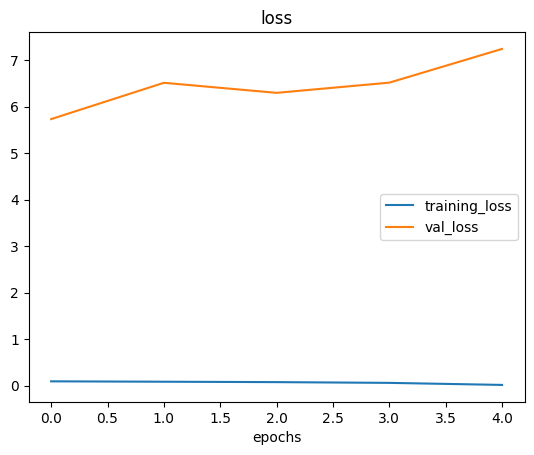

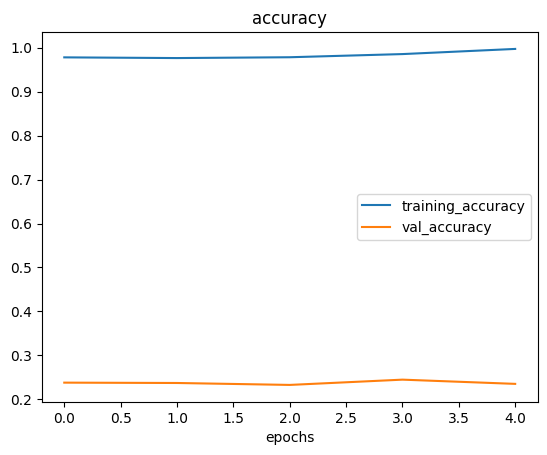

In [143]:
plot_loss_curves(history_10)

In [141]:
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_37 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_39 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [142]:
model_10.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 29160)             0         
                                                                 
 dense_18 (Dense)            (None, 10)              

In [145]:
model_11 = tf.keras.models.clone_model(model_9)

model_11.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_11 = model_11.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 73s 310ms/step - loss: 2.2822 - accuracy: 0.1320 - val_loss: 2.1593 - val_accuracy: 0.2364
Epoch 2/5
235/235 [==============================] - 71s 304ms/step - loss: 2.1426 - accuracy: 0.2293 - val_loss: 1.9951 - val_accuracy: 0.3132
Epoch 3/5
235/235 [==============================] - 72s 307ms/step - loss: 2.0192 - accuracy: 0.2891 - val_loss: 1.8612 - val_accuracy: 0.3640
Epoch 4/5
235/235 [==============================] - 71s 303ms/step - loss: 1.9694 - accuracy: 0.3097 - val_loss: 1.7793 - val_accuracy: 0.3904
Epoch 5/5
235/235 [==============================] - 73s 313ms/step - loss: 1.9278 - accuracy: 0.3361 - val_loss: 1.7791 - val_accuracy: 0.3832


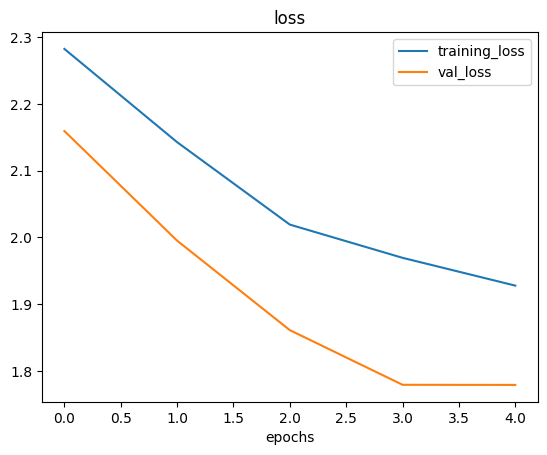

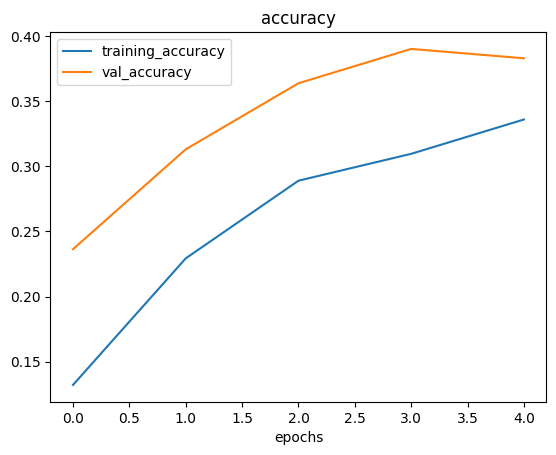

In [146]:
plot_loss_curves(history_11)

In [149]:
model_12 = Sequential([
    Conv2D(filters=10, kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3),activation='relu'),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    Conv2D(filters=10, kernel_size=3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_12.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_12 = model_11.fit(train_data_augmented, epochs=10, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 75s 321ms/step - loss: 1.7676 - accuracy: 0.3983 - val_loss: 1.6086 - val_accuracy: 0.4580
Epoch 2/10
235/235 [==============================] - 72s 305ms/step - loss: 1.7625 - accuracy: 0.4039 - val_loss: 1.5696 - val_accuracy: 0.4756
Epoch 3/10
235/235 [==============================] - 71s 301ms/step - loss: 1.7573 - accuracy: 0.4017 - val_loss: 1.6200 - val_accuracy: 0.4736
Epoch 4/10
235/235 [==============================] - 70s 299ms/step - loss: 1.7479 - accuracy: 0.4011 - val_loss: 1.5939 - val_accuracy: 0.4852
Epoch 5/10
235/235 [==============================] - 71s 302ms/step - loss: 1.7263 - accuracy: 0.4165 - val_loss: 1.5741 - val_accuracy: 0.4708
Epoch 6/10
235/235 [==============================] - 71s 301ms/step - loss: 1.7196 - accuracy: 0.4199 - val_loss: 1.5787 - val_accuracy: 0.4756
Epoch 7/10
235/235 [==============================] - 72s 306ms/step - loss: 1.7189 - accuracy: 0.4188 - val_loss: 1.6998 - val_ac

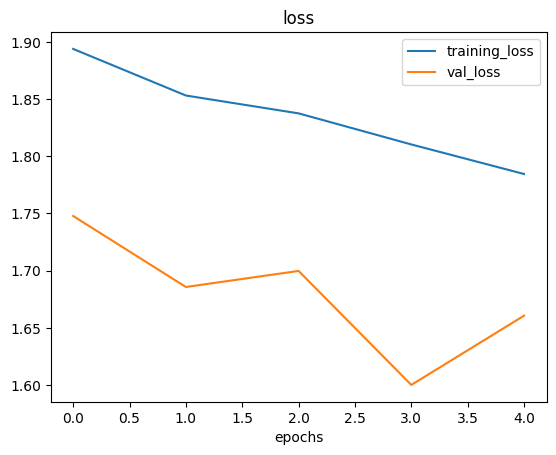

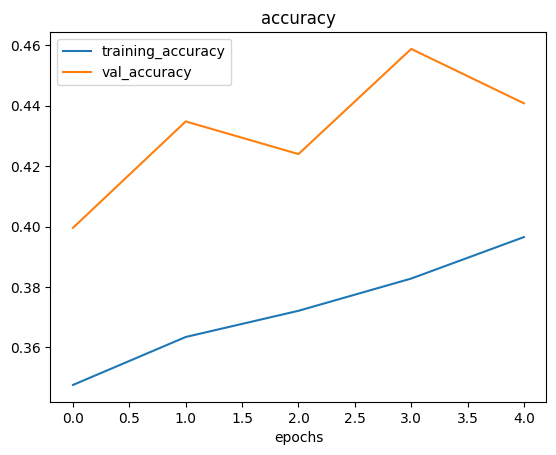

In [148]:
plot_loss_curves(history_12)

In [150]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

1/1 [==============================] - 0s 22ms/step


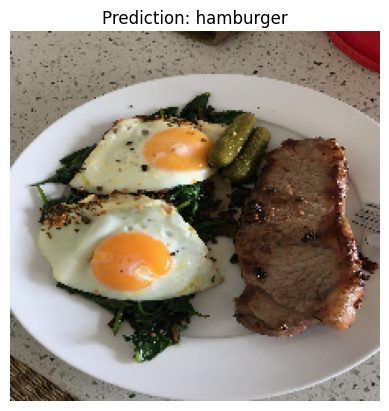

In [200]:
pred_and_plot(model_12,'03-steak.jpeg',class_names=class_names)

1/1 [==============================] - 0s 24ms/step


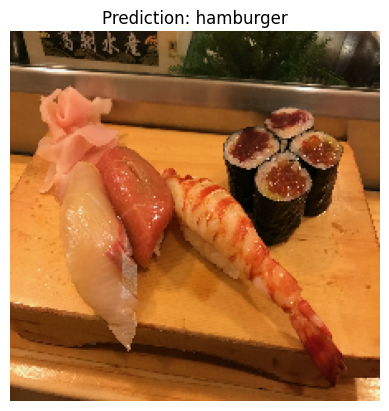

In [201]:
pred_and_plot(model_12,'03-sushi.jpeg',class_names=class_names)

1/1 [==============================] - 0s 20ms/step


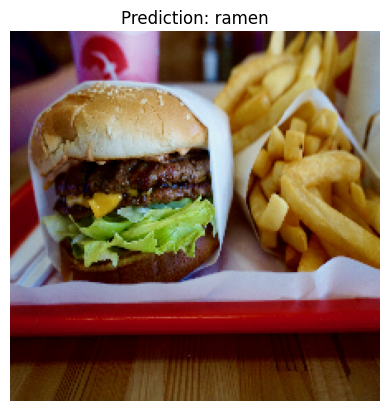

In [202]:
pred_and_plot(model_12,'03-hamburger.jpeg',class_names=class_names)

1/1 [==============================] - 0s 22ms/step


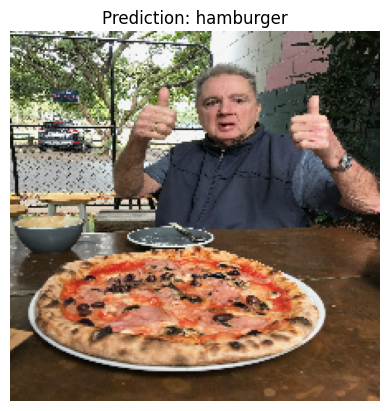

In [203]:
pred_and_plot(model_12,'03-pizza-dad.jpeg',class_names=class_names)